In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import math
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import backend as K

wiki_traffic = pd.read_csv(r"train_1.csv")

In [6]:
traffic_by_site_output={}

In [7]:
# take data
# scale it
# create train and test
# 90 day lookback
# train on length of 4 LSTM


for pg in wiki_traffic['Page'][:3]:
    sample=wiki_traffic[wiki_traffic['Page']==pg]
    sample=sample.T
    sample.columns = sample.iloc[0]
    sample=sample[1:]
    sample=sample.fillna(sample.median())
    
    np.random.seed(7)
    
    data=sample.values
    data=data.astype('float32')
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(data.reshape(-1, 1))
    
    # split into train and test sets
    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)
    
    # reshape into X=t and Y=t+1
    look_back = 90
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    
    traffic_by_site_output[pg]=[trainPredict,testPredict,trainScore,testScore]
    K.clear_session()
    

Epoch 1/100
 - 1s - loss: 0.0066
Epoch 2/100
 - 0s - loss: 0.0062
Epoch 3/100
 - 0s - loss: 0.0060
Epoch 4/100
 - 0s - loss: 0.0059
Epoch 5/100
 - 0s - loss: 0.0058
Epoch 6/100
 - 0s - loss: 0.0057
Epoch 7/100
 - 0s - loss: 0.0056
Epoch 8/100
 - 0s - loss: 0.0055
Epoch 9/100
 - 0s - loss: 0.0054
Epoch 10/100
 - 0s - loss: 0.0054
Epoch 11/100
 - 0s - loss: 0.0053
Epoch 12/100
 - 0s - loss: 0.0052
Epoch 13/100
 - 0s - loss: 0.0052
Epoch 14/100
 - 0s - loss: 0.0051
Epoch 15/100
 - 0s - loss: 0.0050
Epoch 16/100
 - 0s - loss: 0.0049
Epoch 17/100
 - 0s - loss: 0.0049
Epoch 18/100
 - 0s - loss: 0.0048
Epoch 19/100
 - 0s - loss: 0.0048
Epoch 20/100
 - 0s - loss: 0.0047
Epoch 21/100
 - 0s - loss: 0.0047
Epoch 22/100
 - 0s - loss: 0.0046
Epoch 23/100
 - 0s - loss: 0.0046
Epoch 24/100
 - 0s - loss: 0.0046
Epoch 25/100
 - 0s - loss: 0.0045
Epoch 26/100
 - 0s - loss: 0.0045
Epoch 27/100
 - 0s - loss: 0.0044
Epoch 28/100
 - 0s - loss: 0.0044
Epoch 29/100
 - 0s - loss: 0.0044
Epoch 30/100
 - 0s - lo

In [8]:
# test one sample to show what is happening with the process above

sample=wiki_traffic.head(1)
sample=sample.T
sample.columns = sample.iloc[0]
sample=sample[1:]
sample=sample.fillna(sample.median())
sample.head()

Page,2NE1_zh.wikipedia.org_all-access_spider
2015-07-01,18.0
2015-07-02,11.0
2015-07-03,5.0
2015-07-04,13.0
2015-07-05,14.0


In [9]:
np.random.seed(7)

In [10]:
data=sample.values
data=data.astype('float32')

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data.reshape(-1, 1))

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

368 182


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 90
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
trainX

array([[[0.03080082, 0.01642711, 0.00410678, ..., 0.01642711,
         0.02258727, 0.00616016]],

       [[0.01642711, 0.00410678, 0.02053388, ..., 0.02258727,
         0.00616016, 0.01437372]],

       [[0.00410678, 0.02053388, 0.02258727, ..., 0.00616016,
         0.01437372, 0.0349076 ]],

       ...,

       [[0.02874743, 0.01848049, 0.02258727, ..., 0.13552362,
         0.01642711, 0.03080082]],

       [[0.01848049, 0.02258727, 0.02053388, ..., 0.01642711,
         0.03080082, 0.04106776]],

       [[0.02258727, 0.02053388, 0.01232033, ..., 0.03080082,
         0.04106776, 0.01848049]]], dtype=float32)

In [23]:
train

array([[0.03080082],
       [0.01642711],
       [0.00410678],
       [0.02053388],
       [0.02258727],
       [0.01232033],
       [0.01232033],
       [0.03901438],
       [0.04722793],
       [0.04312115],
       [0.03285421],
       [0.01437372],
       [0.02258727],
       [0.02464066],
       [0.01026694],
       [0.02669405],
       [0.01026694],
       [0.01026694],
       [0.02669405],
       [0.00821355],
       [0.01642711],
       [0.01437372],
       [0.0349076 ],
       [0.03080082],
       [0.02464066],
       [0.02258727],
       [0.09445586],
       [0.01437372],
       [0.02669405],
       [0.03080082],
       [0.01026694],
       [0.00410678],
       [0.01232033],
       [0.00821355],
       [0.02053388],
       [0.01232033],
       [0.00821355],
       [0.00205339],
       [0.01642711],
       [0.01437372],
       [0.00410678],
       [0.01232033],
       [0.01232033],
       [0.01232033],
       [0.01232033],
       [0.02053388],
       [0.00205339],
       [0.024

In [15]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0066
Epoch 2/100
 - 0s - loss: 0.0062
Epoch 3/100
 - 0s - loss: 0.0060
Epoch 4/100
 - 0s - loss: 0.0059
Epoch 5/100
 - 0s - loss: 0.0058
Epoch 6/100
 - 0s - loss: 0.0057
Epoch 7/100
 - 0s - loss: 0.0056
Epoch 8/100
 - 1s - loss: 0.0055
Epoch 9/100
 - 1s - loss: 0.0054
Epoch 10/100
 - 1s - loss: 0.0054
Epoch 11/100
 - 0s - loss: 0.0053
Epoch 12/100
 - 0s - loss: 0.0052
Epoch 13/100
 - 0s - loss: 0.0052
Epoch 14/100
 - 1s - loss: 0.0051
Epoch 15/100
 - 0s - loss: 0.0050
Epoch 16/100
 - 0s - loss: 0.0049
Epoch 17/100
 - 1s - loss: 0.0049
Epoch 18/100
 - 1s - loss: 0.0048
Epoch 19/100
 - 0s - loss: 0.0048
Epoch 20/100
 - 0s - loss: 0.0047
Epoch 21/100
 - 0s - loss: 0.0047
Epoch 22/100
 - 1s - loss: 0.0046
Epoch 23/100
 - 0s - loss: 0.0046
Epoch 24/100
 - 0s - loss: 0.0046
Epoch 25/100
 - 0s - loss: 0.0045
Epoch 26/100
 - 0s - loss: 0.0045
Epoch 27/100
 - 0s - loss: 0.0044
Epoch 28/100
 - 1s - loss: 0.0044
Epoch 29/100
 - 1s - loss: 0.0044
Epoch 30/100
 - 1s - lo

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.41 RMSE
Test Score: 29.32 RMSE


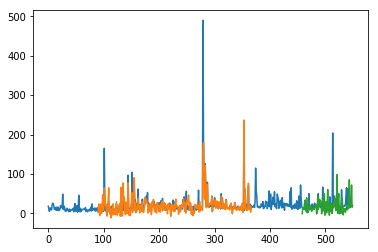

In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()